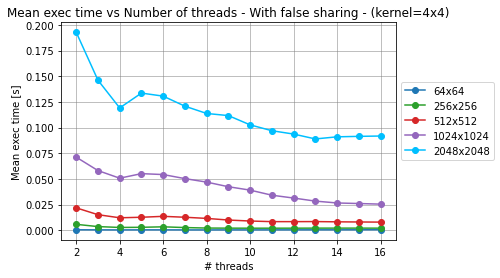

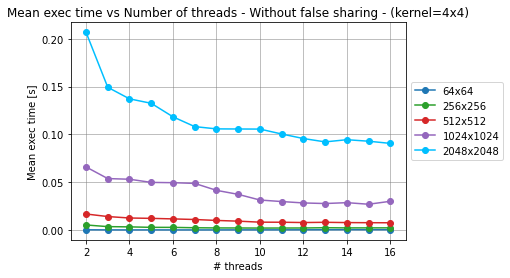

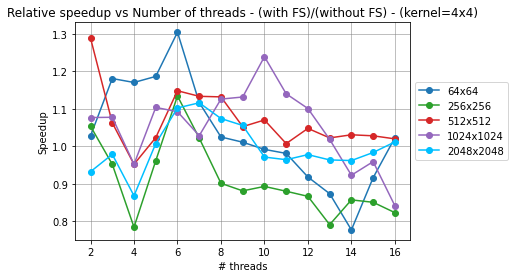

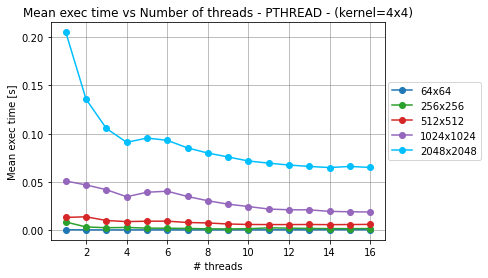

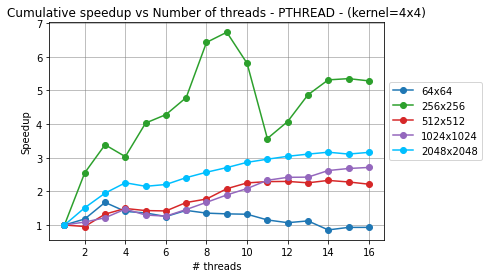

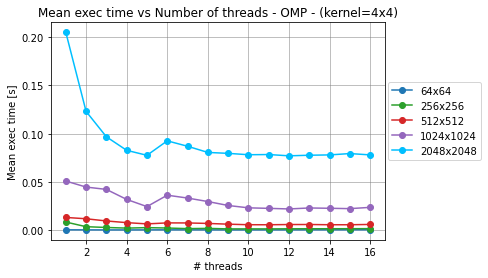

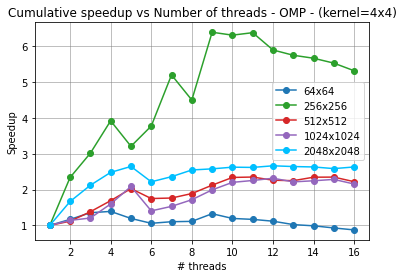

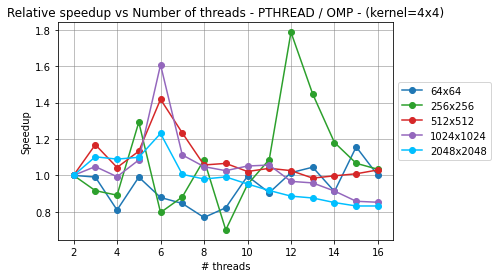

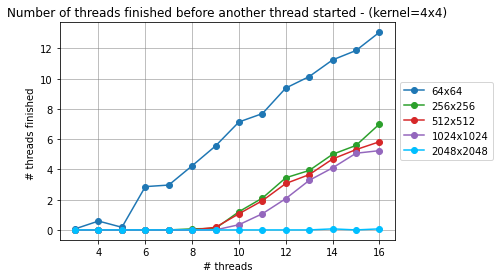

In [6]:
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl 
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


path_FS      = '../false_sharing/csv/false_sharing'
path_NO_FS   = '../false_sharing/csv/NO_false_sharing'
path_OMP     = '../simulation/csv/omp'
path_PTHREAD = '../simulation/csv/pthread'
path_threads = '../simulation/csv/spare_threads'


image        = ['64','256','512','1024','2048']
image_       = [64,256,512,1024,2048]
threads      = ['2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']
threads_     = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
threads_sim  = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']
threads_sim_ = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
csv_name     = 'exec_times'
colors       = ['tab:blue','tab:green','tab:red','tab:purple','deepskyblue','tab:orange','tab:olive','m','springgreen',
                'salmon','paleturquoise','orchid','dodgerblue','yellow','turquoise','royalblue','tomato','chartreuse']


def main():

    #####################################################################################################################################################
    #                                                                  FALSE_SHARING                                                                    #
    #####################################################################################################################################################

    mean_exec_time_FS = [[],[],[],[],[],[]]


    for l in range(0,len(image_)):
        
        for r in range(0,len(threads_)):

            # parse csv
            raw = pd.read_csv(path_FS + '/' + csv_name + '(' + str(image[l]) + 'x' + str(image[l]) + '_4x4)(' + str(threads[r]) + ').csv')

            exec_times = raw[raw.columns[1]]

            mean_exec_time_FS[l].append(np.mean(exec_times))
        
        plt.plot(threads_,mean_exec_time_FS[l],marker='o',color=colors[l],label=image[l]+'x'+image[l])
    
    plt.ylabel('Mean exec time [s]')
    plt.xlabel('# threads')
    plt.title('Mean exec time vs Number of threads - With false sharing - (kernel=4x4)')
    plt.grid(True,color='grey',linewidth='0.5',linestyle='-')
    plt.legend(frameon=True,bbox_to_anchor=(1, 0.75))
    plt.savefig('figures/mean_exec_time_FS(4x4).png', bbox_inches='tight')
    plt.show()

    #####################################################################################################################################################


    #####################################################################################################################################################
    #                                                               NO FALSE_SHARING                                                                    #
    #####################################################################################################################################################

    mean_exec_time_NO_FS = [[],[],[],[],[],[]]


    for l in range(0,len(image_)):
        
        for r in range(0,len(threads_)):

            # parse csv
            raw = pd.read_csv(path_NO_FS + '/' + csv_name + '(' + str(image[l]) + 'x' + str(image[l]) + '_4x4)(' + str(threads[r]) + ').csv')

            exec_times = raw[raw.columns[1]]

            mean_exec_time_NO_FS[l].append(np.mean(exec_times))
        
        plt.plot(threads_,mean_exec_time_NO_FS[l],marker='o',color=colors[l],label=image[l]+'x'+image[l])
    
    plt.ylabel('Mean exec time [s]')
    plt.xlabel('# threads')
    plt.title('Mean exec time vs Number of threads - Without false sharing - (kernel=4x4)')
    plt.grid(True,color='grey',linewidth='0.5',linestyle='-')
    plt.legend(frameon=True,bbox_to_anchor=(1, 0.75))
    plt.savefig('figures/mean_exec_time_NO_FS(4x4).png', bbox_inches='tight')
    plt.show()

    #####################################################################################################################################################


    #####################################################################################################################################################
    #                                                   RELATIVE SPEEDUP (FS[i][j] / NO_FS[i][j])                                                      #
    #####################################################################################################################################################

    speedup    = [[],[],[],[],[],[]]


    for i in range(0,len(image_)):

        for j in range(0,len(threads_)):

            speedup[i].append(mean_exec_time_FS[i][j] / mean_exec_time_NO_FS[i][j])

        plt.plot(threads_,speedup[i],marker='o',color=colors[i],label=image[i]+'x'+image[i])


    plt.ylabel('Speedup')
    plt.xlabel('# threads')
    plt.title('Relative speedup vs Number of threads - (with FS)/(without FS) - (kernel=4x4)')
    plt.grid(True,color='grey',linewidth='0.5',linestyle='-')
    plt.legend(frameon=True,bbox_to_anchor=(1, 0.75))
    plt.savefig('figures/relative_speedup_FS(4x4).png', bbox_inches='tight')
    plt.show()

    #####################################################################################################################################################


    #####################################################################################################################################################
    #                                                                  SIM PTHREAD                                                                      #
    #####################################################################################################################################################

    mean_exec_time_PTHREAD = [[],[],[],[],[],[]]


    for l in range(0,len(image_)):
        
        for r in range(0,len(threads_sim)):

            # parse csv
            raw = pd.read_csv(path_PTHREAD + '/' + csv_name + '(' + str(image[l]) + 'x' + str(image[l]) + '_4x4)(' + str(threads_sim[r]) + ').csv')

            exec_times = raw[raw.columns[1]]

            mean_exec_time_PTHREAD[l].append(np.mean(exec_times))
        
        plt.plot(threads_sim_,mean_exec_time_PTHREAD[l],marker='o',color=colors[l],label=image[l]+'x'+image[l])
    
    plt.ylabel('Mean exec time [s]')
    plt.xlabel('# threads')
    plt.title('Mean exec time vs Number of threads - PTHREAD - (kernel=4x4)')
    plt.grid(True,color='grey',linewidth='0.5',linestyle='-')
    plt.legend(frameon=True,bbox_to_anchor=(1.3, 0.75))
    plt.savefig('figures/mean_exec_time_PTHREAD(4x4).png', bbox_inches='tight')
    plt.show()

    #####################################################################################################################################################


    #####################################################################################################################################################
    #                                                               PTHREAD SPEEDUP                                                                     #
    #####################################################################################################################################################

    speedup    = [[],[],[],[],[],[]]


    for i in range(0,len(image_)):

        for j in range(0,len(threads_sim)):

            speedup[i].append(mean_exec_time_PTHREAD[i][0] / mean_exec_time_PTHREAD[i][j])

        plt.plot(threads_sim_,speedup[i],marker='o',color=colors[i],label=image[i]+'x'+image[i])

    plt.ylabel('Speedup')
    plt.xlabel('# threads')
    plt.title('Cumulative speedup vs Number of threads - PTHREAD - (kernel=4x4)')
    plt.grid(True,color='grey',linewidth='0.5',linestyle='-')
    plt.legend(frameon=True,bbox_to_anchor=(1, 0.75))
    plt.savefig('figures/cumulative_speedup_PTHREAD(4x4).png', bbox_inches='tight')
    plt.show()

    #####################################################################################################################################################

    
    #####################################################################################################################################################
    #                                                                    SIM OMP                                                                        #
    #####################################################################################################################################################

    mean_exec_time_OMP = [[],[],[],[],[],[]]


    for l in range(0,len(image_)):
        
        for r in range(0,len(threads_sim)):

            # parse csv
            raw = pd.read_csv(path_OMP + '/' + csv_name + '(' + str(image[l]) + 'x' + str(image[l]) + '_4x4)(' + str(threads_sim[r]) + ').csv')

            exec_times = raw[raw.columns[1]]

            mean_exec_time_OMP[l].append(np.mean(exec_times))
        
        plt.plot(threads_sim_,mean_exec_time_OMP[l],marker='o',color=colors[l],label=image[l]+'x'+image[l])
    
    plt.ylabel('Mean exec time [s]')
    plt.xlabel('# threads')
    plt.title('Mean exec time vs Number of threads - OMP - (kernel=4x4)')
    plt.grid(True,color='grey',linewidth='0.5',linestyle='-')
    plt.legend(frameon=True,bbox_to_anchor=(1.3, 0.75))
    plt.savefig('figures/mean_exec_time_OMP(4x4).png', bbox_inches='tight')
    plt.show()

    #####################################################################################################################################################


    #####################################################################################################################################################
    #                                                                 OMP SPEEDUP                                                                       #
    #####################################################################################################################################################

    speedup    = [[],[],[],[],[],[]]


    for i in range(0,len(image_)):

        for j in range(0,len(threads_sim)):

            speedup[i].append(mean_exec_time_OMP[i][0] / mean_exec_time_OMP[i][j])

        plt.plot(threads_sim_,speedup[i],marker='o',color=colors[i],label=image[i]+'x'+image[i])

    plt.ylabel('Speedup')
    plt.xlabel('# threads')
    plt.title('Cumulative speedup vs Number of threads - OMP - (kernel=4x4)')
    plt.grid(True,color='grey',linewidth='0.5',linestyle='-')
    plt.legend(frameon=True,bbox_to_anchor=(1, 0.75))
    plt.savefig('figures/cumulative_speedup_OMP(4x4).png', bbox_inches='tight')
    plt.show()

    #####################################################################################################################################################


    #####################################################################################################################################################
    #                                                 RELATIVE SPEEDUP (OMP[i][j] / PTHREAD[i][j])                                                      #
    #####################################################################################################################################################

    speedup    = [[],[],[],[],[],[]]


    for i in range(0,len(image_)):

        for j in range(0,len(threads_)):

            speedup[i].append(mean_exec_time_PTHREAD[i][j] / mean_exec_time_OMP[i][j])

        plt.plot(threads_,speedup[i],marker='o',color=colors[i],label=image[i]+'x'+image[i])


    plt.ylabel('Speedup')
    plt.xlabel('# threads')
    plt.title('Relative speedup vs Number of threads - PTHREAD / OMP - (kernel=4x4)')
    plt.grid(True,color='grey',linewidth='0.5',linestyle='-')
    plt.legend(frameon=True,bbox_to_anchor=(1, 0.75))
    plt.savefig('figures/relative_speedup_OMP_PTHREAD(4x4).png', bbox_inches='tight')
    plt.show()

    #####################################################################################################################################################


    #####################################################################################################################################################
    #                                                THREADS FINISHED BEFORE ANOTHER THREAD HAS STARTED                                                 #
    #####################################################################################################################################################

    array = [[],[],[],[],[]]


    for i in range(0,len(array)):

        for j in range(1,len(threads_)):

            # parse csv
            raw = pd.read_csv(path_threads + '/sim(' + str(image[i]) + 'x' + str(image[i]) + '_4x4)(' + str(threads_sim[j]) + ').csv')

            mean_threads = raw[raw.columns[1]]

            array[i].append(np.mean(mean_threads))

        plt.plot(threads_[1:],array[i],marker='o',color=colors[i],label=image[i]+'x'+image[i])


    plt.ylabel('# threads finished ')
    plt.xlabel('# threads')
    plt.title('Number of threads finished before another thread started - (kernel=4x4)')
    plt.grid(True,color='grey',linewidth='0.5',linestyle='-')
    plt.legend(frameon=True,bbox_to_anchor=(1, 0.75))
    plt.savefig('figures/threads_finished_before(4x4).png', bbox_inches='tight')
    plt.show()

    #####################################################################################################################################################


if __name__ == '__main__':
    main()